# Robot Manipulador paralelo tipo Delta (Maryland Parallel Manipulator)

---
Nota: Para la correcta renderización de este cuaderno, se requieren las siguientes extensiones *nbextensions*:
- Equation Auto Numbering

Para instalar las extensiones *nbextensions*:
- Anaconda: 
 - abrir una instancia de Anaconda console como administrador,
 - ejecutar este comando: pip install jupyter_contrib_nbextensions,
 - reiniciar Jupyter, en el menú aparecerá una pestaña donde se pueden habilitar las extensiones

In [1]:
from IPython.display import HTML,IFrame
#HTML('<iframe width="100%" height="315" src="https://www.youtube.com/embed/8X7KsumRn24" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
IFrame('https://www.youtube.com/embed/8X7KsumRn24','100%','500')

Un robot manipulador paralelo tipo delta es:

- Un robot: máquina **programable** que puede hacer múltiples trabajos
- Un manipulador: mecanismo utilizado para manipular objetos sin contacto directo del operador
- Paralelo: múltiples cadenas cinemáticas conectadas a una misma base
- Delta: esta configuración en particular, conformada por tres brazos, a su vez conformados por paralelogramos.

Este tipo de robots son esencialmente de 3 grados de libertad (GDL), aunque el que se ve en el video cuenta con un cuarto grado de libertad para rotar la herramienta. La base móvil del robot pueden realizar traslaciones en los 3 ejes coordenados.

## Robot delta de la UPB

### Versión Actual

In [2]:
%%html
<iframe src="https://myupb48.autodesk360.com/shares/public/SH56a43QTfd62c1cd9685c5a4d492f32074e?mode=embed" width="100%" height="600" allowfullscreen="true" webkitallowfullscreen="true" mozallowfullscreen="true"  frameborder="0"></iframe>

### Moviéndose

In [22]:
%%html
<iframe width="100%" height="600" src="https://www.youtube.com/embed/MeKVfsm5QFs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Usando herramientas

In [24]:
%%html
<iframe width="100%" height="600" src="https://www.youtube.com/embed/zDm3G-S5zSM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A continuación podemos observar una representación cinemática simple en movimiento

![DeltaMove](https://upload.wikimedia.org/wikipedia/commons/5/56/DeltaRamki.gif "DeltaMove")

Tomado de: http://en.smath.info/forum/yaf_postst2307_Method-A-B--Draghilev-and-animation-spatial-mechanisms.aspx

## Análisis cinemático inverso

El análisis que se desarrollará en este documento está basado en (Tsai, 1999).

Primero analizaremos el robot de forma invertida, es decir, con la base fija en la parte inferior y el origen del sistema de coordenadas en el centro de ésta.

El objetivo de este análisis es: Dada la posición del punto $P$ $(Px,Py,Pz)$
- Debo obtener el ángulo $\theta$
- Para esto debo obtener la ubicación del punto $Q$ $(Qx, Qy, Qz)$

Como podemos ver, el robot se compone por 3 cadenas cinemáticas idénticas. Cada una está compuesta por una barra conectada a la base fija (brazo), que a su vez está unida con un eslabonamiento de cuatro barras tipo paralelogramo (antebrazo). 

El antebrazo se suele implementar usando pares esféricos, sin embargo, se puede lograr lo mismo usando una configuración con pares de revoluta (R)

A continuación desarrollaremos el análisis cinemático inverso de una de las cadenas cinemáticas para hallar el ángulo $\theta$. Se puede repetir el proceso para las demás cadenas variando los parámetros correspondientes.

### Identificación de parámetros

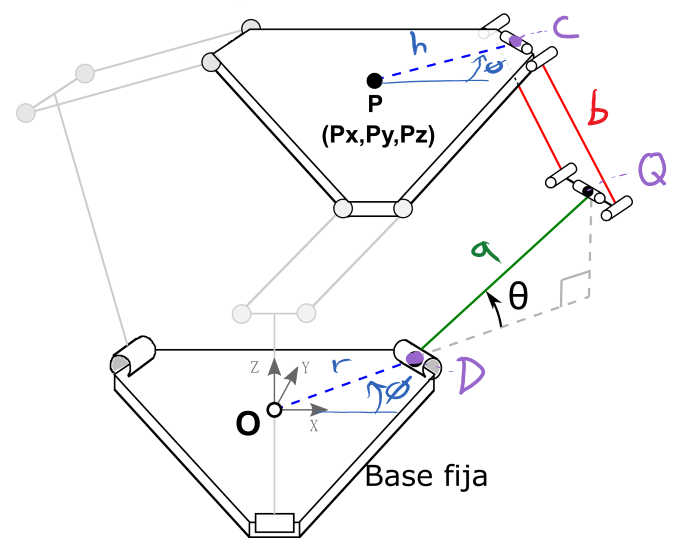

<a id='fig:parametros'>Parámetros</a>

Debemos identificar algunas cantidades clave en el análisis:

- Los puntos $O, D, Q, C, P$ determinan la geometría de la cadena cinemática.
- $a$ es la longitud del brazo
- $b$ es la longitud del antebrazo
- $r$ y $h$ son la distancia entre los centros de las bases y las barras a las que se encuentran unidas.
- $\phi$ es el ángulo entre el eje x y la cadena cinemática. Este ángulo es constante en este tipo de mecanismos, aunque cabe resaltar que cada cadena cinemática tiene un valor diferente.

Ahora usaremos como ejemplo, el caso específico del robot Delta de la UPB, segunda versión, ya que esta fue implementada usando pares R.

### Robot Delta UPB versión 2 (Pares R)

In [3]:
%%html
<iframe src="https://myupb48.autodesk360.com/shares/public/SH56a43QTfd62c1cd9689ca18cda82354182?mode=embed" width="100%" height="600" allowfullscreen="true" webkitallowfullscreen="true" mozallowfullscreen="true"  frameborder="0"></iframe>

Conociendo el modelo del robot, vamos ahora a enfocarnos en una sola cadena cinemática.

### Descripción cinemática

Describiremos el movimiento de la cadena cinemática en términos de cómo se mueven el brazo y el antebrazo.



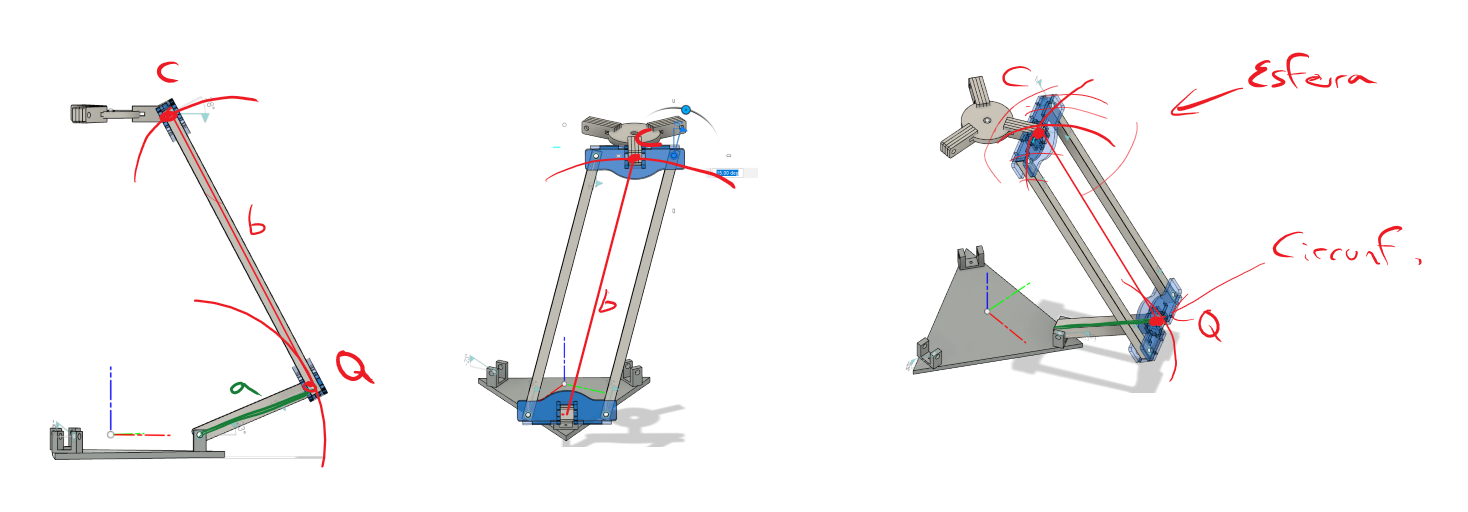

El movimiento del brazo ($a$) está limitado por un par R, por lo cual el punto Q sólo se mueve sobre una trayectoria circular.

El movimiento del punto $C$ depende del antebrazo, que se compone de un eslabonamiento de cuatro barras tipo paralelogramo. Este tiene la particularidad de garantizar paralelismo entre las barras opuestas. Además, en ambos extremos del paralelogramo, se tienen dos pares R en los puntos $Q$ y $C$, los cuales le dan al punto $C$ una rotación adicional. La combinación de ambas rotaciones, es decir, la que permite el eslabonamiento cuatro barras y el par R en el punto $Q$, hacen que el punto $C$ describa una trayectoria esférica.

### Sobre el análisis cinemático inverso

En este análisis, se tiene como dato de entrada un **punto de interés** del mecanismo, y se busca hallar valores de las variables. Como se mencionó anteriormente, el dato de entrada en este caso es la posición del punto $P$, i.e., $P_x, P_y, P_z$, y se desea obtener el ángulo $\theta$. Esto con el fin de programar los servo-motores del robot Delta de la UPB.

Para hallar dicho ángulo, debemos conocer la ubicación del punto $Q$. Esto requiere que identifiquemos qué puntos de la cadena cinemática tenemos ubicados. Podemos empezar por el origen $O$ y el punto $P$. Si tenemos las dimensiones de las bases $r$ y $h$ junto con el ángulo $\phi$, podemos encontrar los puntos $C$ y $D$. Ahora bien, sabemos que $Q$ se encuentra en la intersección del brazo y el antebrazo, por lo cual, si conocemos las ecuaciones que modelan la posición de estos, tendremos un sistema de ecuaciones que podremos resolver para $Q_x, Q_y, Q_z$.

El movimiento del brazo $a$ forma una trayectoria circular, mientras que el movimiento del antebrazo $b$ forma una trayectoria esférica, por lo cual el punto $Q$ se puede hallar como la intersección de una circunferencia y una esfera en el espacio. 

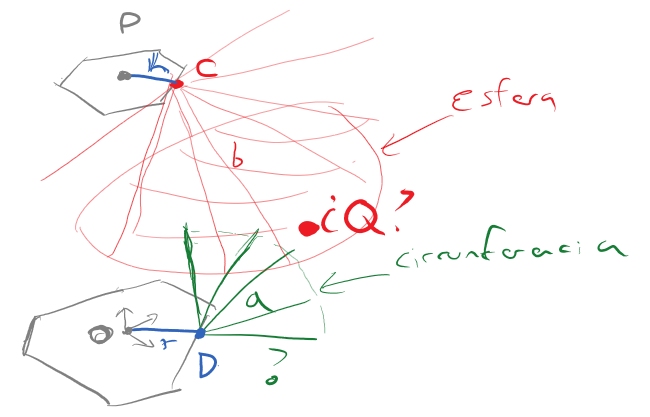

Cabe resaltar que una circunferencia en el espacio se puede obtener al intersecar una esfera con un plano, por lo cual se requiere modelar tres superficies, lo que me lleva a tener tres ecuaciones no lineales, correspondiente a tres incógnitas ($Q_x, Q_y, Q_z$).

### Ecuaciones no lineales

Partiendo de los parámetros establecidos en [esta figura](#fig:parametros), podemos conformar un sistema de ecuaciones que corresponda a:

1. Una esfera de radio $a$ y centro $D$

\begin{equation}
\label{eq:esfera1}
(Q_x - D_x)^2+(Q_y - D_y)^2+(Q_z - D_z)^2 = a^2
\end{equation}

2. Una esfera de radio $b$ y centro $C$

\begin{equation}
\label{eq:esfera2}
(Q_x - C_x)^2+(Q_y - C_y)^2+(Q_z - C_z)^2 = b^2
\end{equation}

3. Un plano que contiene a la linea $OQ$ (o a la linea $a$) y es perpendicular al plano $xy$

\begin{equation}
\label{eq:plano}
Q_x cos(\phi + 90°)+Q_y sin(\phi + 90°) = 0
\end{equation}

Resolviendo este sistema de ecuaciones se puede encontrar la ubicación del punto $Q$. Luego es posible obtener $\theta$ usando operaciones trigonométricas inversas.

Podemos ver una representación gráfica de estas superficies a continuación

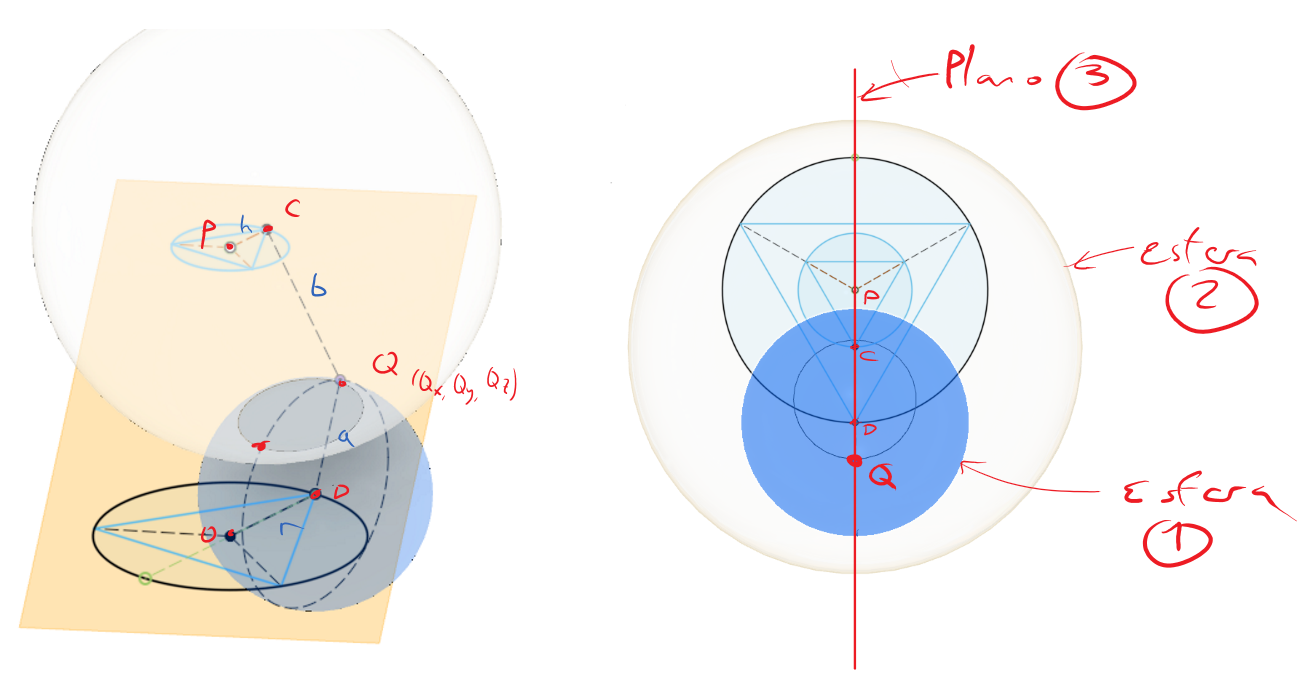

Podemos también notar que la intersección de estas superficies da lugar a dos puntos matemáticamente válidos. Sin embargo, debe determinarse a partir del contexto físico del manipulador, cuál es la solución correcta.

### $D$, $C$ y el plano

- ¿Cómo calcular $D$ ($D_x,D_y,D_z$) en términos de los demás parámetros?

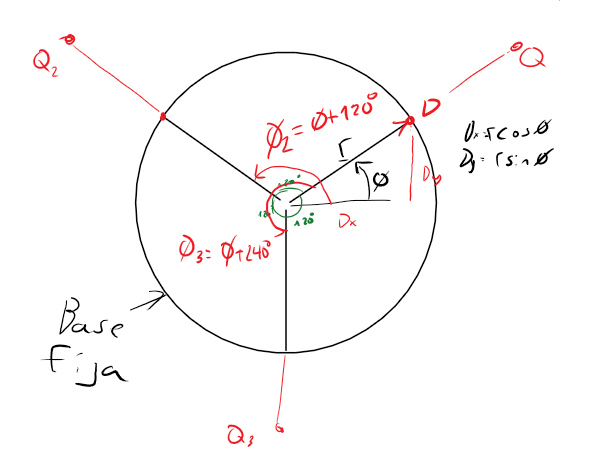

$D_x = rcos(\phi)$, $D_y = rsin(\phi)$ y $D_z = 0$ 

- ¿Cómo calcular $C$ ($C_x,C_y,C_z$) en términos de los demás parámetros?

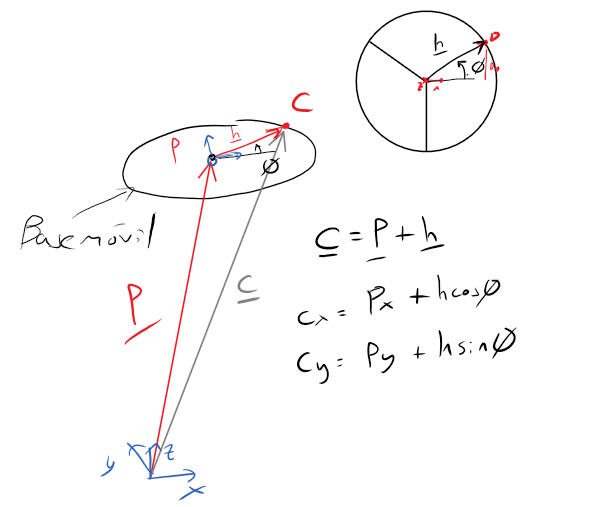

$C_x = P_x + hcos(\phi)$, $C_y = P_y + hsin(\phi)$ y $C_z = Pz$ 

- ¿Cómo especificar un plano que contenga a la linea  $OQ$  (o a la linea  $a$ ) y sea perpendicular al plano $xy$

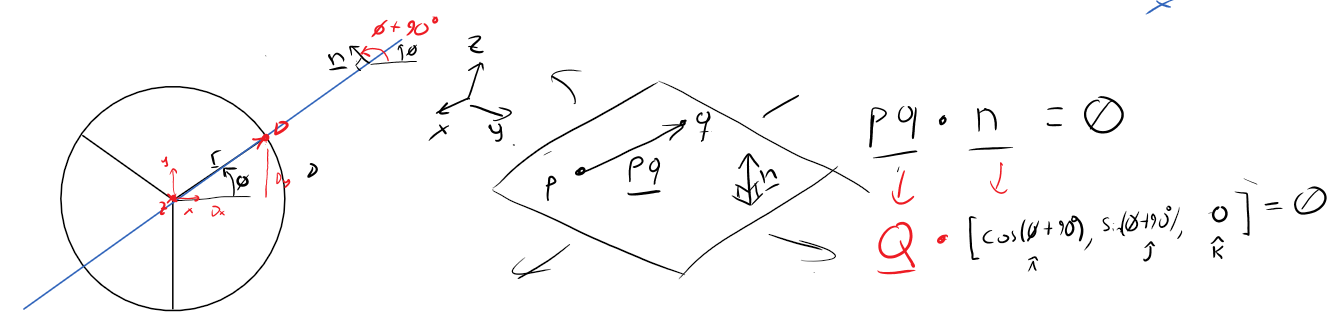

### Solución para las demás cadenas cinemáticas

¿qué parámetro cambia entre cadenas cinemáticas? la respuesta está en alguna de las figuras anteriores :)

## Referencias

Tsai, L.-W. (1999). Robot Analysis and Design: The Mechanics of Serial and Parallel Manipulators (1st ed.). John Wiley &amp; Sons, Inc.